# EO-HARVEST
## Demonstration with CODA Service (Eumetsat)

CODA is the Eumetsat platform giving access to Sentinel-3 products (https://coda.eumetsat.int for NRT products, https://codarep.eumetsat.int for reprocessed data). It requires a personal account.

In [1]:
# import eo-harvest package
import eo_harvest

# and other stuff
import datetime
import shapely.geometry


## Simple search
Searching granules for a dataset using time and space criteria. Let's search for instance Sentinel-3 Ocean Color L2 Full Resolution dataset, whose id is `OL_2_WFR___` (refer to https://coda.eumetsat.int/manual/CODA-user-manual.pdf or CODA web site for dataset identifiers)

In [2]:
# define search area
area = shapely.geometry.box(-50, -20, -20, 20)

# define search time frame
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 1, 2)

# performs the search
# first args is the data store, here `CODA`
res = eo_harvest.search_granule(
    'CODA',
    'OL_2_WFR___',
    start,
    end,
    area,
    fetchall=True
)


fetching https://coda.eumetsat.int/search?q=%28beginPosition:%5B2020-01-01T00:00:00Z%20TO%202020-01-02T00:00:00Z%5D%20OR%20endPosition:%5B2020-01-01T00:00:00Z%20TO%202020-01-02T00:00:00Z%5D%29%20AND%20producttype:OL_2_WFR___%20AND%20timeliness:Non%20Time%20Critical%20AND%20footprint:%22Intersects%28POLYGON%20%28%28-20%20-20%2C%20-20%2020%2C%20-50%2020%2C%20-50%20-20%2C%20-20%20-20%29%29%29%22&start=0&rows=100


## Inspecting the result

We get in ``res`` variable the list of granules, with their properties, that were returned by the query.  A few operations can be done on these results.


### Display result footprints

It is possible to display the location of these found granules using ``plot`` function:

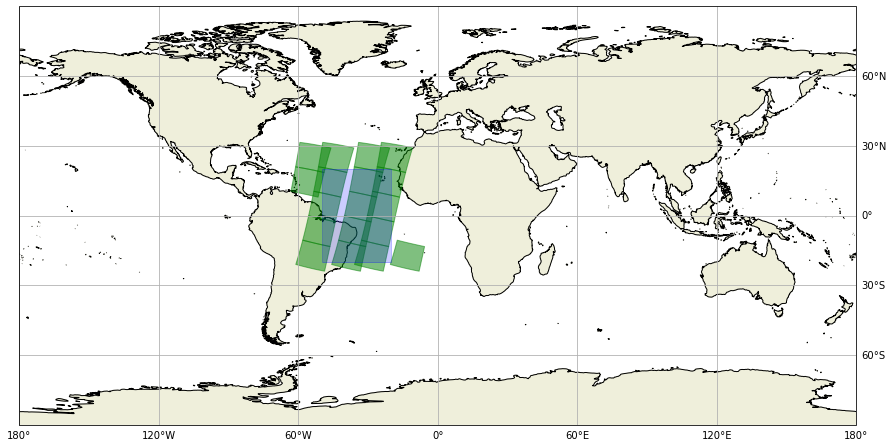

In [3]:
# display the location of found granules
eo_harvest.plot(res, clip=area)

### Description of the returned granules

The properties of the returned granules can be inspected, just printing the returned granule objects:

In [4]:
# display the details of the first granule in the returned list
print(res.items[0])

S3B_OL_2_WFR____20200101T112545_20200101T112845_20200108T055039_0179_034_037_3060_MAR_O_NT_002
   start: 2020-01-01 11:25:45.420000
   end: 2020-01-01 11:28:45.420000
   footprint: POLYGON ((-32.8655 -10.5964, -32.2643 -10.7426, -31.6474 -10.8981, -31.0327 -11.0517, -30.4212 -11.203, -29.8055 -11.3539, -29.1902 -11.5032, -28.5639 -11.6545, -27.9493 -11.7981, -27.333 -11.9433, -26.7202 -12.093, -26.1017 -12.2354, -25.4836 -12.3762, -24.853 -12.517, -24.2333 -12.6549, -23.6114 -12.7916, -22.9981 -12.923, -22.3771 -13.0564, -21.7524 -13.1863, -21.1272 -13.3182, -20.5533 -10.6705, -19.9776 -8.01463, -19.4 -5.3582, -18.819 -2.70112, -19.4289 -2.56472, -20.0358 -2.43219, -20.6421 -2.29685, -21.2411 -2.1649, -21.8467 -2.02928, -22.4531 -1.89319, -23.0683 -1.756, -23.6745 -1.6194, -24.2819 -1.48232, -24.882 -1.33959, -25.4862 -1.20266, -26.0926 -1.06772, -26.7082 -0.927121, -27.3139 -0.789554, -27.9207 -0.651585, -28.5241 -0.514222, -29.1312 -0.375895, -29.7412 -0.236802, -30.3362 -0.107906, -

In [5]:
# print the name and URL of found granules
for c in res.items:
    print(c.name, c.url)

S3B_OL_2_WFR____20200101T112545_20200101T112845_20200108T055039_0179_034_037_3060_MAR_O_NT_002 http://coda.eumetsat.int/odata/v1/Products('c5aa5b17-bbf3-47e8-8e39-29fac56ee651')/$value
S3B_OL_2_WFR____20200101T112845_20200101T113145_20200108T055119_0179_034_037_3240_MAR_O_NT_002 http://coda.eumetsat.int/odata/v1/Products('201da5ca-ebff-497f-a5f2-5729e411e160')/$value
S3B_OL_2_WFR____20200101T111645_20200101T111945_20200108T054832_0179_034_037_2520_MAR_O_NT_002 http://coda.eumetsat.int/odata/v1/Products('496ba460-0612-4449-ad90-b933066bf5a9')/$value
S3B_OL_2_WFR____20200101T112245_20200101T112545_20200108T054959_0179_034_037_2880_MAR_O_NT_002 http://coda.eumetsat.int/odata/v1/Products('ede2487a-4b59-4d33-83eb-3fb1781b376b')/$value
S3B_OL_2_WFR____20200101T111945_20200101T112245_20200108T054917_0179_034_037_2700_MAR_O_NT_002 http://coda.eumetsat.int/odata/v1/Products('c6c9bf26-ee49-4dc0-bf2b-c48289f2b088')/$value
S3B_OL_2_WFR____20200101T130945_20200101T131245_20200108T041749_0179_034_03

## Quicklook

CODA returns also a link to a quicklook image for each collected granule. It can be downloaded and displayed as follow:

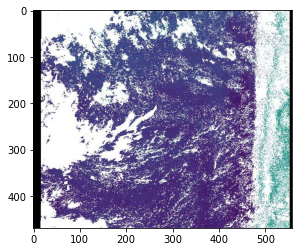

In [6]:
res.items[0].display_quicklook()


## Another example with SST

fetching https://coda.eumetsat.int/search?q=%28beginPosition:%5B2020-01-01T00:00:00Z%20TO%202020-01-02T00:00:00Z%5D%20OR%20endPosition:%5B2020-01-01T00:00:00Z%20TO%202020-01-02T00:00:00Z%5D%29%20AND%20producttype:SL_2_WST___%20AND%20timeliness:Non%20Time%20Critical%20AND%20footprint:%22Intersects%28POLYGON%20%28%28-20%20-20%2C%20-20%2020%2C%20-50%2020%2C%20-50%20-20%2C%20-20%20-20%29%29%29%22&start=0&rows=100


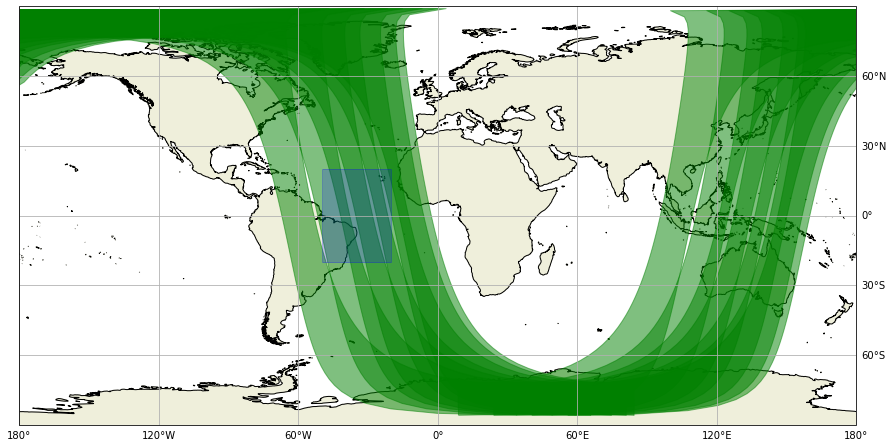

In [7]:
# performs the same search with product `SL_2_WST___`
res = eo_harvest.search_granule(
    'CODA',
    'SL_2_WST___',
    start,
    end,
    area,
    fetchall=True
)

# display the location of found granules
eo_harvest.plot(res, clip=area)

## Additional filters

CODA does not have a different dataset id for each Sentinel-3 satellite. An additional filter, `platform` (value among `S3A`, `S3B`,...), must be used to select for instance only Sentinel-3A.

Other filters can be use as well (refer to CODA API documentation: https://coda.eumetsat.int/manual/CODA-user-manual.pdf)  

fetching https://coda.eumetsat.int/search?q=%28beginPosition:%5B2020-01-01T00:00:00Z%20TO%202020-01-02T00:00:00Z%5D%20OR%20endPosition:%5B2020-01-01T00:00:00Z%20TO%202020-01-02T00:00:00Z%5D%29%20AND%20filename:S3A%2A%20AND%20producttype:SL_2_WST___%20AND%20timeliness:Non%20Time%20Critical%20AND%20footprint:%22Intersects%28POLYGON%20%28%28-20%20-20%2C%20-20%2020%2C%20-50%2020%2C%20-50%20-20%2C%20-20%20-20%29%29%29%22&start=0&rows=100


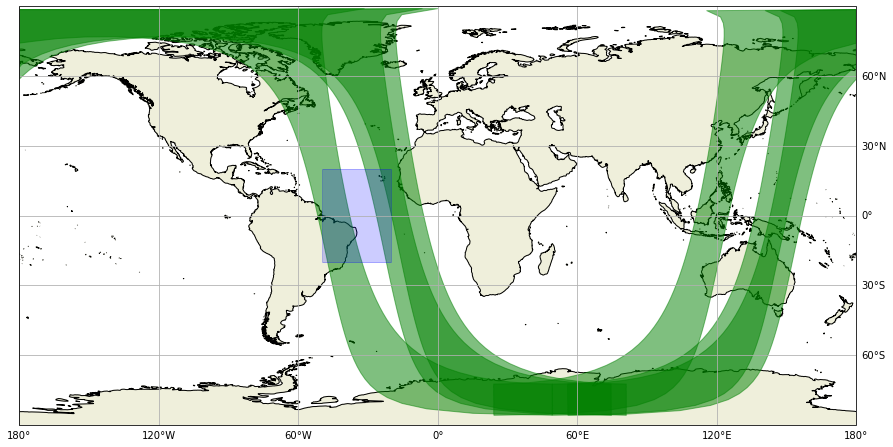

In [8]:
# performs the same search with product `SL_2_WST___` but this time we only
# want the results for Sentinel-3A (S3A)
res = eo_harvest.search_granule(
    'CODA',
    'SL_2_WST___',
    start,
    end,
    area,
    platform="S3A",
    fetchall=True
)

# display the location of found granules
eo_harvest.plot(res, clip=area)

## Download
Each returned granule (in ``res.items`` list) can be downloaded (``wget`` is used behind the scene), calling the ``download`` method on the granule to download. Main argument, ``mystore`` is the root folder where to save the downloaded granule: it will be saved in a subfolder ``<store name>/<product identifier>/<year>/<day>/``. 

In [9]:
res.items[0].download(mystore='.', silent=False)

Downloading: http://coda.eumetsat.int/odata/v1/Products('80914b24-179a-4986-8254-43e3600b267c')/$value to CODA/SL_2_WST___/2020/001/S3A_SL_2_WST____20200101T223553_20200102T001653_20200107T010927_6059_053_186______MAR_O_NT_003


True

## Multi-search
Let's search crossovers over a storm track for instance, e.g. a series of time and locations. The `multisearch` function allows to pass on the full list of time and locations, and harvest a consolidate result.

This step may takes a long time here, as we send a search request for each storm track time step (every hour), so more than 200 requests for the whole storm life time.

In [6]:
# WARNING: requires to install certoolbox: https://gitlab.ifremer.fr/jp0540d/certoolbox 
import certoolbox.hurricanes

# first get a storm track from our storm track directory
# identifier of the storm in ATCF convention
ATCF_NAME = 'wp202019'

# read the track
track = certoolbox.hurricanes.track(ATCF_NAME)

# transform into a list of time and search areas, using a colocation radius of 0.5 degrees (to ensure we are close to storm eye).
# The track is interpolated hourly for better precision and we will search within 30 minutes around each hourly track point.
targets = certoolbox.hurricanes.searchable_track(track, radius=0.5, interpolate='1H')

Run the multi-search (may take some time) and display result

In [7]:
res = eo_harvest.multisearch(
    'CODA',
    'OL_2_WFR___',
    targets,
    delta_time=datetime.timedelta(minutes=30),
)

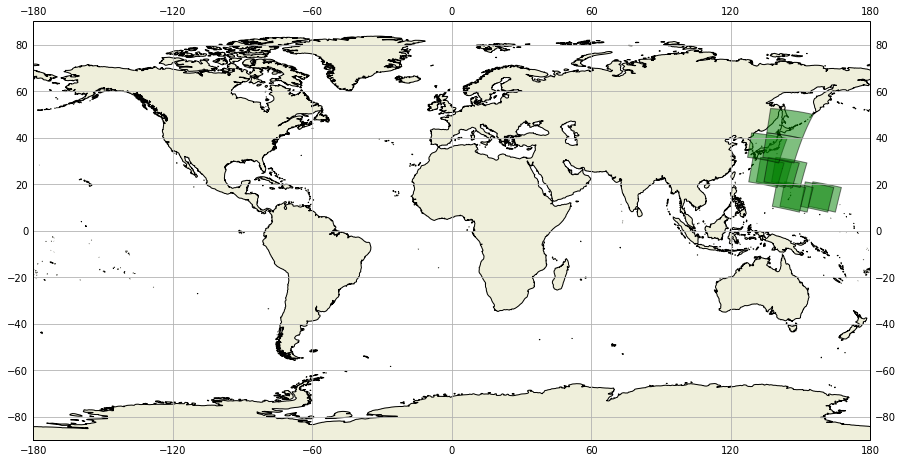

In [9]:
eo_harvest.plot(res)